# Step 1: Import required libraries

In [0]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set()
import plotnine as p9
from plotnine import *

# Step 2: Import and get a sense of data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#store data in pandas data frame
cars = pd.read_csv("/content/drive/My Drive/Data Sets/Cars/data.csv")
cars.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [0]:
cars.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


# Step 3: Drop Duplicate Rows

In [0]:
# Total number of rows and columns
cars.shape

(11914, 16)

In [0]:
# Rows containing duplicate data
duplicate_rows = cars[cars.duplicated()]
print("number of duplicate rows, columns: ", duplicate_rows.shape)

number of duplicate rows, columns:  (715, 16)


In [0]:
# Count the number of rows before removing the data
cars.count()

Make                 11914
Model                11914
Year                 11914
Engine Fuel Type     11911
Engine HP            11845
Engine Cylinders     11884
Transmission Type    11914
Driven_Wheels        11914
Number of Doors      11908
Market Category       8172
Vehicle Size         11914
Vehicle Style        11914
highway MPG          11914
city mpg             11914
Popularity           11914
MSRP                 11914
dtype: int64

In [0]:
# Dropping the duplicates 
cars_duplicate_rows_dropped = cars.drop_duplicates()

# Counting the number of rows after removing duplicates.
cars_duplicate_rows_dropped.count()


Make                 11199
Model                11199
Year                 11199
Engine Fuel Type     11196
Engine HP            11130
Engine Cylinders     11169
Transmission Type    11199
Driven_Wheels        11199
Number of Doors      11193
Market Category       7823
Vehicle Size         11199
Vehicle Style        11199
highway MPG          11199
city mpg             11199
Popularity           11199
MSRP                 11199
dtype: int64

# Step 4: Drop Missing or Null Values

In [0]:
# Finding the null values.
print(cars_duplicate_rows_dropped.isnull().sum())

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


In [0]:
# Dropping the missing values.
cars_missing_values_dropped = cars_duplicate_rows_dropped.dropna() 
cars_missing_values_dropped.count()

Make                 7735
Model                7735
Year                 7735
Engine Fuel Type     7735
Engine HP            7735
Engine Cylinders     7735
Transmission Type    7735
Driven_Wheels        7735
Number of Doors      7735
Market Category      7735
Vehicle Size         7735
Vehicle Style        7735
highway MPG          7735
city mpg             7735
Popularity           7735
MSRP                 7735
dtype: int64

In [0]:
# After dropping the values
print(cars_missing_values_dropped.isnull().sum())

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


 # Step 5: Check Data Types

In [0]:
cars_missing_values_dropped.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

# Step 6: Drop Irrelevent Columns

In [0]:
cars_columns_dropped = cars_missing_values_dropped.drop(['Engine Fuel Type', 'Popularity'], axis='columns')
cars_columns_dropped.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,34500


# Step 7: Rename Columns



In [0]:
cars_columns_renamed = cars_columns_dropped.rename(columns={'Engine HP': 'HP', 'Engine Cylinders': 'Cylinders', 'Transmission Type': 'Transmission', 'Driven_Wheels': 'Drive','Number of Doors':'Doors', 'Market Category':'Category','Vehicle Size':'Size', 'Vehicle Style':'Style', 'highway MPG': 'MPG-H', 'city mpg': 'MPG-C', 'MSRP': 'Price' })
cars_columns_renamed.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive,Doors,Category,Size,Style,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,34500


# Step 8: Run descriptive stats

In [0]:
cars_columns_renamed.describe()

,Year,HP,Cylinders,Doors,MPG-H,MPG-C,Price
count,7735.00000,7735.000000,7735.000000,7735.000000,7735.00000,7735.000000,7.735000e+03
mean,2012.14958,277.632062,5.825469,3.421332,26.52980,19.468649,5.102826e+04
std,6.23167,115.529955,1.895593,0.895054,7.78492,7.231534,7.153777e+04
min,1990.00000,55.000000,0.000000,2.000000,12.00000,7.000000,2.000000e+03
25%,2010.00000,194.000000,4.000000,2.000000,22.00000,16.000000,2.622500e+04
50%,2015.00000,270.000000,6.000000,4.000000,26.00000,18.000000,3.560000e+04
75%,2016.00000,325.000000,6.000000,4.000000,30.00000,22.000000,4.947750e+04
max,2017.00000,1001.000000,16.000000,4.000000,354.00000,137.000000,2.065902e+06


# Step 9: Detect Outliers

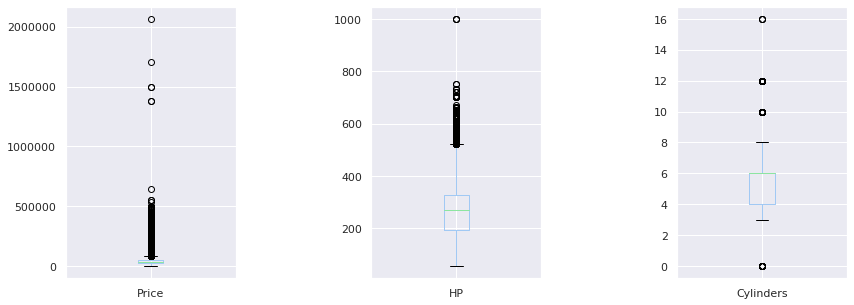

In [0]:
sns.set_palette('pastel')

fig = plt.figure(figsize=(14,5))
fig.subplots_adjust(wspace=0.5, hspace=1)

plt.subplot(1,3,1)
cars_columns_renamed.boxplot(['Price'])

plt.subplot(1,3,2)
cars_columns_renamed.boxplot(['HP'])

plt.subplot(1,3,3)
cars_columns_renamed.boxplot(['Cylinders'])

plt.subplots_adjust(wspace=0.80)

plt.show()

# Step 10: Drop Outliers using Interquartile Range (IQR)

In [0]:
Q1 = cars_columns_renamed.quantile(0.25)
Q3 = cars_columns_renamed.quantile(0.75)
IQR = Q3 - Q1 #interquartile range: spread of the middle half or the middle 50% of the data.
print(IQR)

Year             6.0
HP             131.0
Cylinders        2.0
Doors            2.0
MPG-H            8.0
MPG-C            6.0
Price        23252.5
dtype: float64


In [0]:
cars_clean_data = cars_columns_renamed[~((cars_columns_renamed < (Q1 - 1.5 * IQR)) |(cars_columns_renamed > (Q3+1.5 * IQR))).any(axis=1)]
cars_clean_data.shape

(6046, 14)

# Step 11: Bar Graph - Number of Cars by Make

Text(0.5, 0, 'Make')

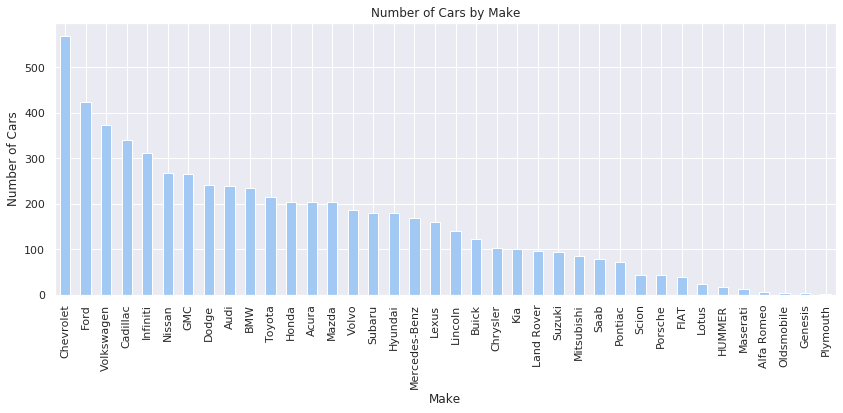

In [0]:
sns.set_palette('pastel')
cars_clean_data.Make.value_counts().plot(kind='bar', figsize=(14,5))
plt.title('Number of Cars by Make')
plt.ylabel('Number of Cars')
plt.xlabel('Make')

# Step 12: Group Data - Average Price by Car Make

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

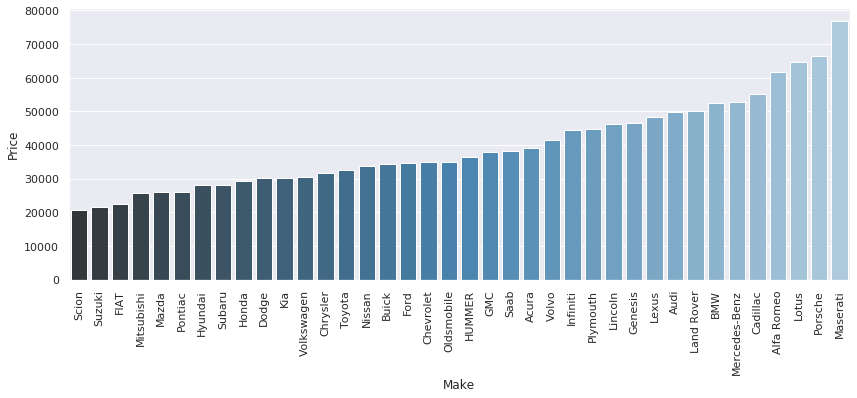

In [0]:
#Group by make and sort by avg. price
Make_and_Price = cars_clean_data[['Make', 'Price']]
Make_by_Price = Make_and_Price.groupby(['Make'])['Price'].mean().reset_index().sort_values('Price')

# visualize avg. price by make
plt.figure(figsize=(14,5))
sns.barplot('Make', 'Price', data=Make_by_Price, palette='Blues_d')
plt.xticks(rotation='vertical')

# Step 12: ANOVA (Analysis of Variance)
Relation between groups of categorical data

In [0]:
# Very small variance between “Audi” and “Land Rover”, their average price is almost same
sp.stats.f_oneway(Make_and_Price.loc[Make_and_Price['Make'] == 'BMW', 'Price'], Make_and_Price.loc[Make_and_Price['Make'] == 'Mercedes-Benz','Price'])

F_onewayResult(statistic=0.12128620896044728, pvalue=0.7278259589083105)

Null Hypothesis: Group means are equal.
Small F satistic and big p-value - Yes, group means are equal. 

In [0]:
# Large variance between “BMW” and “Suzuki”, their average price is significantly different
sp.stats.f_oneway(Make_and_Price.loc[Make_and_Price['Make'] == 'BMW', 'Price'], Make_and_Price.loc[Make_and_Price['Make'] == 'Suzuki', 'Price'])

F_onewayResult(statistic=436.93200794441094, pvalue=3.2642631211579674e-62)

Null Hypothesis: Group means are equal.
Big F statistic and small p-value - No, null hypothes is False.

# Step 13: Scatter Plot - Relationship between Price and other variables

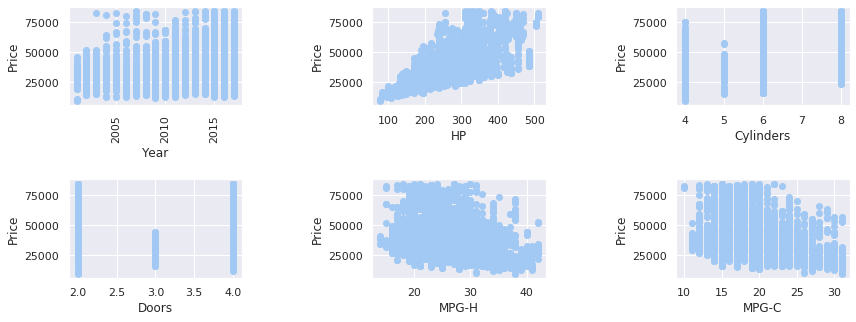

In [0]:
fig = plt.figure(figsize=(14,5))
fig.subplots_adjust(wspace=0.75, hspace=0.75)
fig.subplots(2, 3, sharey='row')

plt.subplot(2,3,1)
plt.scatter(cars_clean_data['Year'],cars_clean_data['Price'])
plt.xlabel('Year')
plt.xticks(rotation='vertical')
plt.ylabel('Price')

plt.subplot(2,3,2)
plt.scatter(cars_clean_data['HP'], cars_clean_data['Price'])
plt.xlabel('HP')
plt.ylabel('Price')

plt.subplot(2,3,3)
plt.scatter(cars_clean_data['Cylinders'],cars_clean_data['Price'])
plt.xlabel('Cylinders')
plt.ylabel('Price')

plt.subplot(2,3,4)
plt.scatter(cars_clean_data['Doors'],cars_clean_data['Price'])
plt.xlabel('Doors')
plt.ylabel('Price')

plt.subplot(2,3,5)
plt.scatter(cars_clean_data['MPG-H'],cars_clean_data['Price'])
plt.xlabel('MPG-H')
plt.ylabel('Price')

plt.subplot(2,3,6)
plt.scatter(cars_clean_data['MPG-C'],cars_clean_data['Price'])
plt.xlabel('MPG-C')
plt.ylabel('Price')

plt.show()

# Step 14: Heat Map - Correlations between all variables

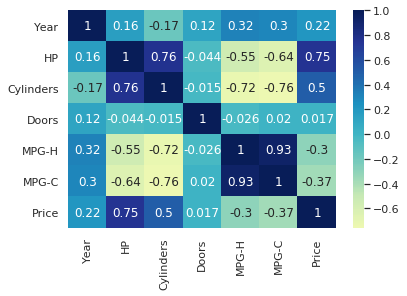

In [0]:
correlation_matrix = cars_clean_data.corr()
sns.heatmap(correlation_matrix,annot=True, cmap="YlGnBu", center=0)

#Step 15: Regression Plots - Check Correlations

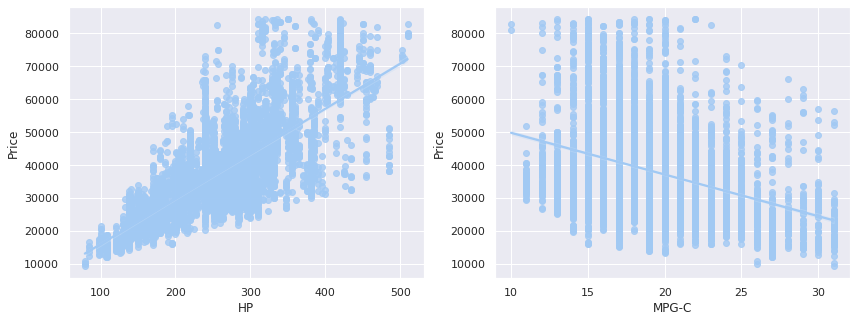

In [0]:
fig = plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.regplot(x='HP',y='Price',data=cars_clean_data)
#Positive correlation between Price and HP

plt.subplot(1,2,2)
sns.regplot(x='MPG-C',y='Price',data=cars_clean_data)
#Negative correlation between Price and MPG-C

#Step 16: Histograms and Normalized Distributions

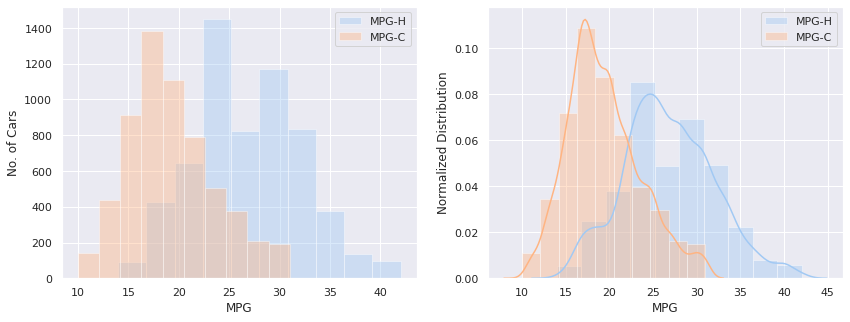

In [0]:
fig = plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.hist('MPG-H', bins=10, alpha=0.4, data=cars_clean_data, label='MPG-H')
plt.hist('MPG-C', bins=10, alpha=0.4, data=cars_clean_data, label='MPG-C')
plt.xlabel('MPG')
plt.ylabel('No. of Cars')
plt.legend()

plt.subplot(1,2,2)
sns.distplot(cars_clean_data['MPG-H'], bins=10, label='MPG-H')
sns.distplot(cars_clean_data['MPG-C'], bins=10, label='MPG-C')
plt.xlabel('MPG')
plt.ylabel('Normalized Distribution')
plt.legend()

plt.show()

# Step 13: Box Plots - Comparing Price Difference By Cylinder Categories

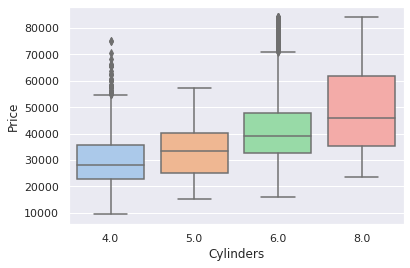

In [0]:
sns.boxplot(x='Cylinders',y='Price', data = cars_clean_data)

#Step 14: Adding Third Dimension with color - relation between HP, MPG-H and Car Size

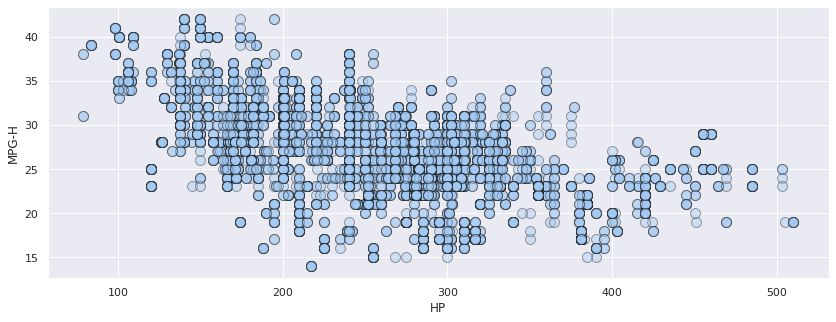

In [0]:
#Usual 2D scatter plot
fig = plt.figure(figsize=(14, 5))
plt.scatter('HP', 'MPG-H', data=cars_clean_data, alpha=0.4, s = 100, edgecolors='k')
plt.xlabel('HP')
plt.ylabel('MPG-H')
plt.show()

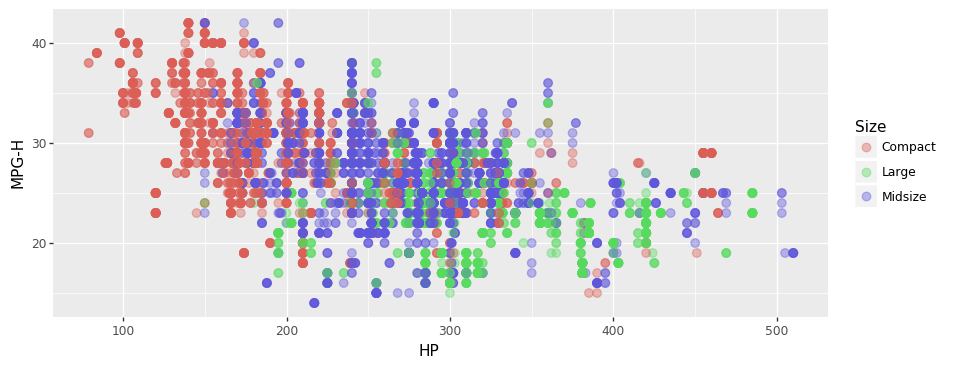

<ggplot: (-9223363288897950383)>

In [0]:
# Add third dimension (size) with color.
p9.options.figure_size = (10,4)
p9.ggplot(cars_clean_data, aes(x='HP', y='MPG-H', color = 'Size')) + geom_point(alpha=0.4, size = 3)